In [1]:
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
import tables
import matplotlib as mpl

In [12]:
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft.hdf5"
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft_opt4.hdf5"

In [113]:
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft_opt4_h10km.hdf5"
with tables.open_file(path) as h5file:
    result = []
    for group in h5file.root:
        table = h5file.get_node(group, "stacking_simple")
        print(repr(table.attrs))
        break

/sim0000/stacking_simple._v_attrs (AttributeSet), 29 attributes:
   [CLASS := 'TABLE',
    FIELD_0_FILL := 0,
    FIELD_0_NAME := 'event',
    FIELD_1_FILL := 0,
    FIELD_1_NAME := 'id',
    FIELD_2_FILL := 0,
    FIELD_2_NAME := 'parent_id',
    FIELD_3_FILL := 0,
    FIELD_3_NAME := 'particle',
    FIELD_4_FILL := 0.0,
    FIELD_4_NAME := 'energy',
    FIELD_5_FILL := 0.0,
    FIELD_5_NAME := 'theta',
    FIELD_6_FILL := 0.0,
    FIELD_6_NAME := 'radius',
    FIELD_7_FILL := 0.0,
    FIELD_7_NAME := 'z',
    FIELD_8_FILL := 0.0,
    FIELD_8_NAME := 'time',
    NROWS := 175,
    TITLE := '',
    VERSION := '2.7',
    path := 'sim0000',
    text := '/npm/geometry/type gdml\n/npm/geometry/gdml ../SpaceCraftFullAtmosphere.gdml\n/npm/thunderstorm/physics FTFP_BERT_opt4\n/npm/thunderstorm/minimal_energy 10.0 MeV\n/npm/thunderstorm/stacking/electron false\n/npm/thunderstorm/stacking/positron false\n/npm/thunderstorm/stacking/gamma true\n/npm/thunderstorm/stacking/save_gamma false\n/npm/thu

In [44]:
def get_data(path):
    with tables.open_file(path) as h5file:
        result = []
        for group in h5file.root:
            table = h5file.get_node(group, "stacking_simple")
            data = table.read()
            result.append(data)
        return np.hstack(result)

In [118]:
def plot_z_hist(data, name="air.png", weight = 1):
    indx = data["z"] < 800000

    plt.hist(data["z"][indx]/1000, weights=weight*np.ones(np.sum(indx)))
    plt.yscale("log")
    plt.xlabel("Высота, км")
    plt.ylabel("Число нейтронов")
    plt.tight_layout()
    plt.savefig(name, fmt="png", dpi=600, transparent=True)
    print("Отношение рожденных в корабле к рожденным в атмосфере: {}".format(np.sum(np.logical_not(indx))/np.sum(indx)))

In [117]:
def plot_spacecraft(data, name="solid.png", weight = 1):
    indx = data["z"] > 880000
    data = data["z"][indx]-880000
    data = data[data < 500]
    plt.hist(data, weights=weight*np.ones(data.size))
    plt.xlabel("Толщина детектора, метры")
    plt.ylabel("Число нейтронов")
    plt.tight_layout()
    plt.savefig(name, fmt="png", dpi=600, transparent=True)

In [96]:
def plot_ratio(data, thickness = 100, name="ratio.png"):
    indx = data["z"] < 880000
    n_air = np.sum(indx)
    data = data["z"][np.logical_not(indx)] - 880000
    data = data[data <  thickness ]
    bins=np.arange(0,  thickness + 1 , 1)
    hist, _ = np.histogram(data, bins=bins)
    data = np.cumsum(hist)
    plt.grid(True)
    plt.plot(bins[:-1], data/n_air)
    plt.xlabel("Толщина детектора, метры")
    plt.ylabel("Отношение рожденных в детекторе\n к рожденным в атмосфере")
    plt.tight_layout()
    plt.savefig(name, fmt="png", dpi=600, transparent=True)


In [97]:
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft.hdf5"
data = get_data(path)

Отношение рожденных в корабле к рожденным в атмосфере: 29.294418604651163


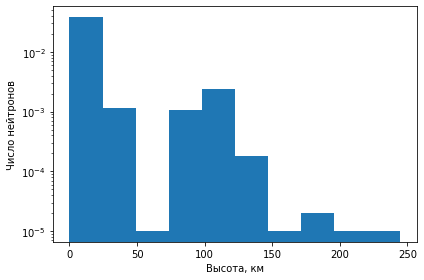

In [98]:
plot_z_hist(data, weight=1e-5)

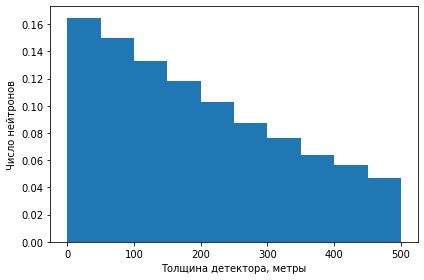

In [99]:
plot_spacecraft(data, weight=1e-5)

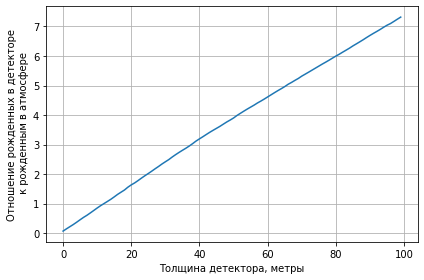

In [100]:
plot_ratio(data)

(array([3.131e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0.        , 0.00593557, 0.01187115, 0.01780672, 0.0237423 ,
        0.02967787, 0.03561344, 0.04154902, 0.04748459, 0.05342016,
        0.05935574]),
 <a list of 10 Patch objects>)

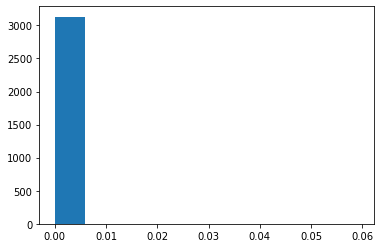

In [112]:
indx1 = data["z"] < 880000
indx2 = data["radius"] < 0.25
indx = np.logical_and(indx1, indx2)
plt.hist(data["radius"][indx])

(array([1.25905e+05, 0.00000e+00, 2.00000e+00, 5.00000e+00, 1.00000e+00,
        8.00000e+00, 1.30000e+01, 6.00000e+00, 9.00000e+00, 1.70000e+01]),
 array([  0.        ,  38.8564637 ,  77.7129274 , 116.5693911 ,
        155.4258548 , 194.2823185 , 233.13878219, 271.99524589,
        310.85170959, 349.70817329, 388.56463699]),
 <a list of 10 Patch objects>)

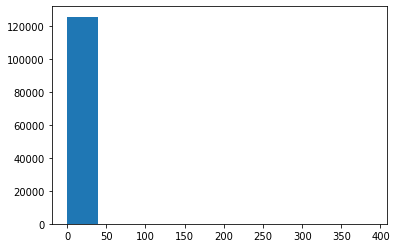

In [104]:
plt.hist(data["radius"][np.logical_not(indx)]/1000)


In [114]:
path = "/mnt/storage2/phd/data/thunderstorm/neutron/spacecraft_opt4_h10km.hdf5"
data_opt4 = get_data(path)

Отношение рожденных в корабле к рожденным в атмосфере: 0.01381074168797954


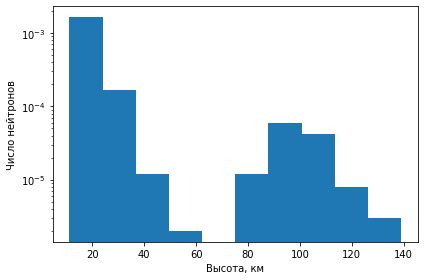

In [119]:
plot_z_hist(data_opt4, weight=1e-6)

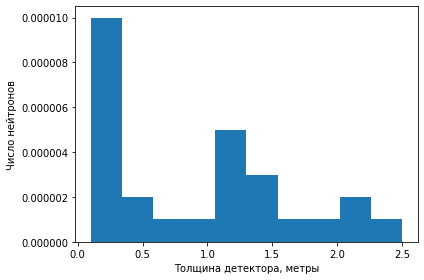

In [120]:
plot_spacecraft(data_opt4,  weight=1e-6)